<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
!kaggle datasets download -d heptapod/titanic

Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic
License(s): DbCL-1.0
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [237]:
import zipfile

with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [238]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
test_df=pd.read_csv("test.csv")


In [240]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [243]:
test_df.drop('PassengerId',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)


In [244]:
y=df.Survived.values

In [245]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [246]:
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})
test_df["Embarked"]=test_df["Embarked"].map({"S":0,"C":1,"Q":2})

In [247]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [248]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.drop('Survived',axis=1,inplace=True)
df.isnull().sum()

<ipython-input-248-9979b9bb36c8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
<ipython-input-248-9979b9bb36c8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [249]:
test_df["Age"].fillna(test_df["Age"].median(),inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0],inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
test_df.isnull().sum()

<ipython-input-249-f3b6612aff26>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Age"].fillna(test_df["Age"].median(),inplace=True)
<ipython-input-249-f3b6612aff26>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [250]:
test_data=pd.read_csv("gender_submission.csv")
test_data.head()
test_data.drop('PassengerId',axis=1,inplace=True)
y_test=test_data.Survived.values

In [251]:
import numpy as np
data=np.array(df)

x_test=np.array(test_df)
x_test.shape


(418, 7)

In [252]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(data)
X
x_test=scaler.transform(x_test)

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [254]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [255]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7988826815642458

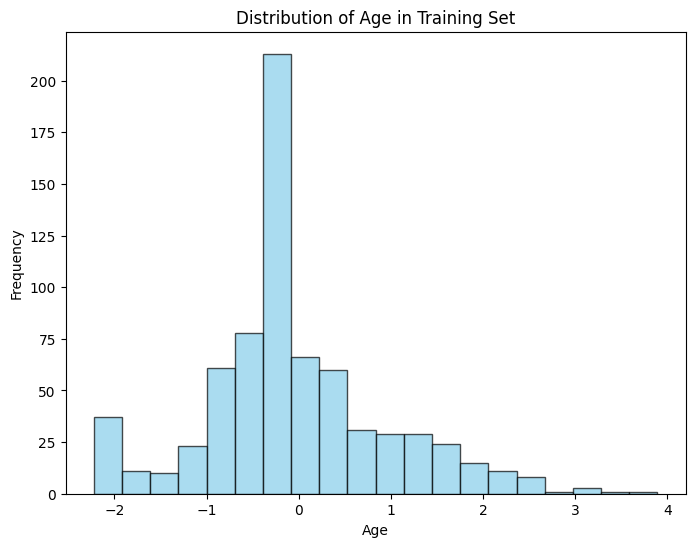

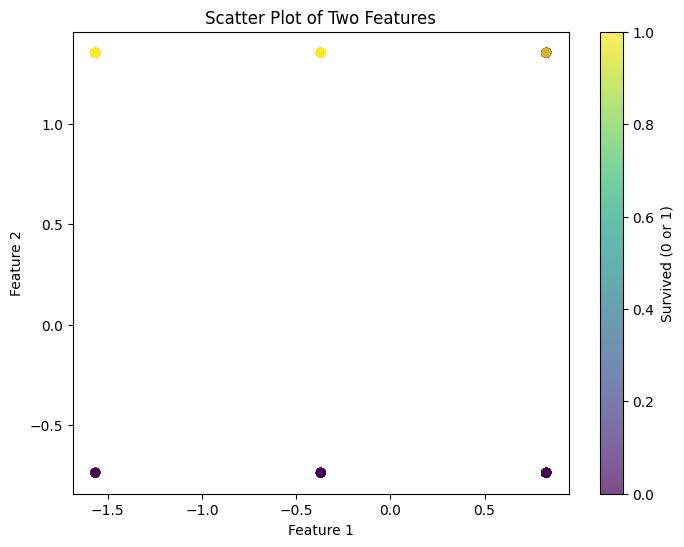

In [256]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(X_train[:, 2], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Age in Training Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Survived (0 or 1)')
plt.show()
